In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("dataset/time_series_375_prerpocess_en.xlsx", index_col=[0,1])
df_clean = df.drop(columns=[ 'Admission time', 'Discharge time'])
df_clean = df_clean.groupby('PATIENT_ID').first()
df_clean

,age,gender,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,Prothrombin time,procalcitonin,eosinophils(%),Interleukin 2 receptor,...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,Hypersensitive c-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,
1,73,1,0,19.9,136.0,103.1,13.9,0.09,0.6,NaN,...,31.9,37.9,43.1,0.09,137.7,0.12,41.0,16.0,46.6,130.0
2,61,1,0,16.9,135.0,99.9,14.3,0.09,0.0,1152.0,...,31.9,42.3,27.4,NaN,138.2,0.30,40.0,38.0,81.3,88.0
3,70,2,0,NaN,109.0,99.1,13.6,0.06,0.0,591.0,...,31.1,34.8,42.3,0.10,135.7,0.20,66.0,19.0,77.2,69.0
4,74,1,0,4.8,84.0,100.8,16.3,0.38,1.5,NaN,...,44.2,NaN,108.2,0.11,137.9,0.10,72.0,20.0,82.0,81.0
5,29,2,0,5.6,120.0,99.7,14.6,0.02,0.2,258.0,...,29.9,NaN,7.0,0.08,140.2,0.22,15.0,12.0,120.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,63,1,1,1741.5,143.0,95.7,14.4,1.51,0.0,758.0,...,30.4,43.8,152.0,NaN,135.8,0.16,19.0,31.0,88.6,81.0
372,79,1,1,51.4,115.0,111.5,17.4,2.13,0.2,1833.0,...,29.9,56.3,320.0,0.06,147.0,0.15,93.0,40.0,13.7,345.0
373,61,2,1,124.8,100.0,102.6,14.9,0.56,0.1,NaN,...,27.6,36.7,205.8,NaN,141.6,0.18,NaN,9.0,101.3,47.0


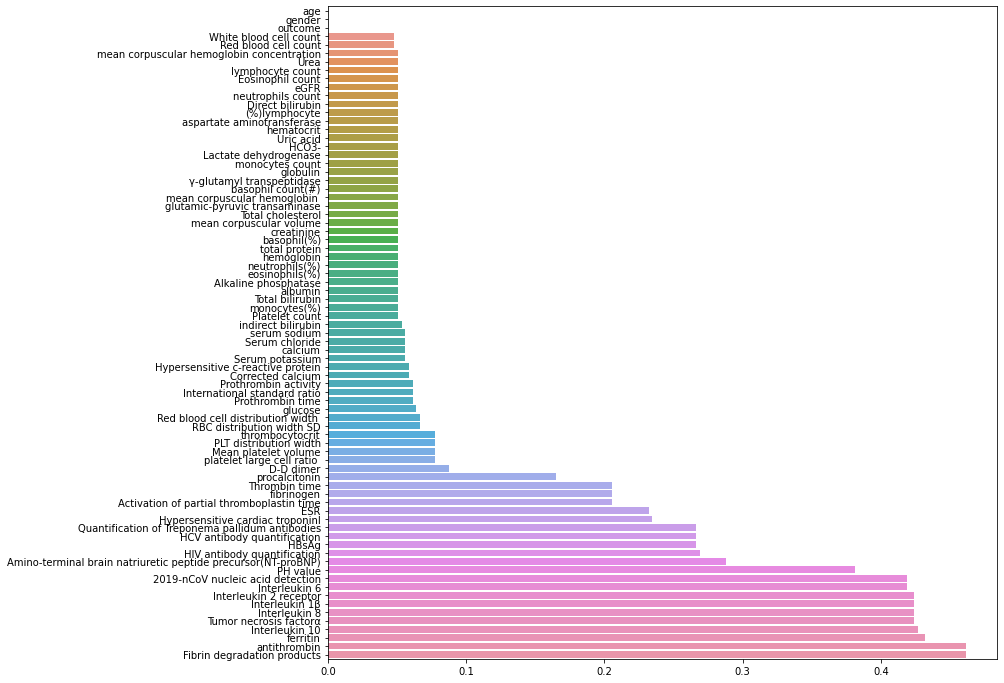

In [6]:
dados_faltantes = df_clean.isna().mean().sort_values(ascending=True)
plt.figure(figsize=(12,12));
sns.barplot(x=dados_faltantes, y=dados_faltantes.index);

In [7]:
sel_col = df_clean.columns[(df_clean.isna().mean() <= 0.2).values]
df_clean[sel_col]

,age,gender,outcome,hemoglobin,Serum chloride,Prothrombin time,procalcitonin,eosinophils(%),Alkaline phosphatase,albumin,...,γ-glutamyl transpeptidase,International standard ratio,basophil count(#),mean corpuscular hemoglobin,Hypersensitive c-reactive protein,serum sodium,thrombocytocrit,glutamic-pyruvic transaminase,eGFR,creatinine
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,
1,73,1,0,136.0,103.1,13.9,0.09,0.6,46.0,33.3,...,24.0,1.06,0.01,31.9,43.1,137.7,0.12,16.0,46.6,130.0
2,61,1,0,135.0,99.9,14.3,0.09,0.0,33.0,35.3,...,41.0,1.09,0.01,31.9,27.4,138.2,0.30,38.0,81.3,88.0
3,70,2,0,109.0,99.1,13.6,0.06,0.0,47.0,34.9,...,21.0,1.04,0.00,31.1,42.3,135.7,0.20,19.0,77.2,69.0
4,74,1,0,84.0,100.8,16.3,0.38,1.5,66.0,33.9,...,15.0,1.29,0.01,44.2,108.2,137.9,0.10,20.0,82.0,81.0
5,29,2,0,120.0,99.7,14.6,0.02,0.2,78.0,40.2,...,19.0,1.13,0.01,29.9,7.0,140.2,0.22,12.0,120.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,63,1,1,143.0,95.7,14.4,1.51,0.0,65.0,30.7,...,27.0,1.10,0.00,30.4,152.0,135.8,0.16,31.0,88.6,81.0
372,79,1,1,115.0,111.5,17.4,2.13,0.2,136.0,19.6,...,363.0,1.40,0.01,29.9,320.0,147.0,0.15,40.0,13.7,345.0
373,61,2,1,100.0,102.6,14.9,0.56,0.1,141.0,23.9,...,39.0,1.18,0.01,27.6,205.8,141.6,0.18,9.0,101.3,47.0


In [8]:
Y = df_clean.outcome
X = df_clean.drop(columns=["outcome"])

import_feature = pd.DataFrame(columns=X.columns)
for i in range(100): # 50,150
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
    model = XGBClassifier(
                max_depth=4
                ,learning_rate=0.2
                ,reg_lambda=1
                ,n_estimators=150
                ,subsample = 0.9
                ,colsample_bytree = 0.9)
    model.fit(x_train, y_train)
    import_feature = import_feature.append(pd.DataFrame(model.feature_importances_, index=X.columns).transpose())

[18:00:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:00:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:00:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:00:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [9]:
X_best = X[import_feature.mean().sort_values(ascending=False).head(5).index]
X_best

,Lactate dehydrogenase,neutrophils(%),(%)lymphocyte,procalcitonin,Amino-terminal brain natriuretic peptide precursor(NT-proBNP)
PATIENT_ID,,,,,
1,306.0,65.8,22.6,0.09,60.0
2,738.0,89.2,7.5,0.09,173.0
3,328.0,75.0,19.1,0.06,NaN
4,338.0,82.0,12.5,0.38,152.0
5,195.0,54.9,37.9,0.02,5.0
...,...,...,...,...,...
371,573.0,79.5,15.0,1.51,NaN
372,276.0,93.2,1.6,2.13,2568.0
373,702.0,89.0,6.3,0.56,NaN


In [10]:
x_train, x_test, y_train, y_test = train_test_split(X_best, Y, test_size=0.3, random_state=3463)
model = XGBClassifier(
                max_depth=4,
                learning_rate=0.2,
                reg_lambda=1,
                n_estimators=150,
                subsample=0.9,
                colsample_bytree=0.9,
                verbosity=0)
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [11]:
predict_labels = model.predict(x_test)
confusion_matrix_ = confusion_matrix(y_test, predict_labels)
pd.DataFrame(confusion_matrix_, index=["Sobreviveu", "morreu"], columns=["Previsto como Sobrevivente", "Previsto como morto"])

,Previsto como Sobrevivente,Previsto como morto
Sobreviveu,50,11
morreu,3,49


In [12]:
f1_score(y_test, predict_labels)

0.8749999999999999

In [13]:
df = pd.read_excel("dataset/time_series_375_prerpocess_en.xlsx", index_col=[0,1])
df_clean = df.drop(columns=[ 'Admission time', 'Discharge time'])
df_clean = df_clean.groupby('PATIENT_ID').first()
sel_col = df_clean.columns[(df_clean.isna().mean() <= 0.2).values]
df_clean = df_clean[sel_col]

df_clean["NLR"] = df_clean['neutrophils count'] / df_clean['lymphocyte count']
df_clean.drop(labels=['lymphocyte count', 'neutrophils count', "neutrophils(%)", "(%)lymphocyte"], 
                          axis=1, inplace=True)

Y = df_clean.outcome
X = df_clean.drop(columns=["outcome"])

import_feature = pd.DataFrame(columns=X.columns)
for i in range(100): # 50,150
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
    model = XGBClassifier(
                max_depth=4,
                learning_rate=0.2,
                reg_lambda=1,
                n_estimators=150,
                subsample=0.9,
                colsample_bytree=0.9,
                verbosity=0)
    model.fit(x_train, y_train)
    import_feature = import_feature.append(pd.DataFrame(model.feature_importances_, index=X.columns).transpose())

X_best = X[import_feature.mean().sort_values(ascending=False).head(5).index]
X_best

,Lactate dehydrogenase,NLR,procalcitonin,D-D dimer,Hypersensitive c-reactive protein
PATIENT_ID,,,,,
1,306.0,2.912500,0.09,2.20,43.1
2,738.0,11.875000,0.09,0.96,27.4
3,328.0,3.929577,0.06,0.98,42.3
4,338.0,6.546667,0.38,1.26,108.2
5,195.0,1.446429,0.02,0.42,7.0
...,...,...,...,...,...
371,573.0,5.285714,1.51,2.57,152.0
372,276.0,59.476190,2.13,1.21,320.0
373,702.0,14.210526,0.56,NaN,205.8


In [20]:
pd.DataFrame(import_feature.mean().sort_values(ascending=False).head(15))


,0
Lactate dehydrogenase,0.205580
NLR,0.080747
procalcitonin,0.062211
D-D dimer,0.037127
Hypersensitive c-reactive protein,0.035820
Prothrombin time,0.025550
Urea,0.023963
White blood cell count,0.023203
albumin,0.019986
age,0.019160


In [14]:
x_train, x_test, y_train, y_test = train_test_split(X_best, Y, test_size=0.3, random_state=3463)
model = XGBClassifier(
                max_depth=4
                ,learning_rate=0.2
                ,reg_lambda=1
                ,n_estimators=150
                ,subsample = 0.9
                ,colsample_bytree = 0.9)
model.fit(x_train, y_train)

predict_labels = model.predict(x_test)
confusion_matrix_ = confusion_matrix(y_test, predict_labels)
pd.DataFrame(confusion_matrix_, index=["Sobreviveu", "morreu"], columns=["Previsto como Sobrevivente", "Previsto como morto"])

,Previsto como Sobrevivente,Previsto como morto
Sobreviveu,46,15
morreu,4,48


In [15]:
f1_score(y_test, predict_labels)

0.8347826086956522

<AxesSubplot:xlabel='NLR'>

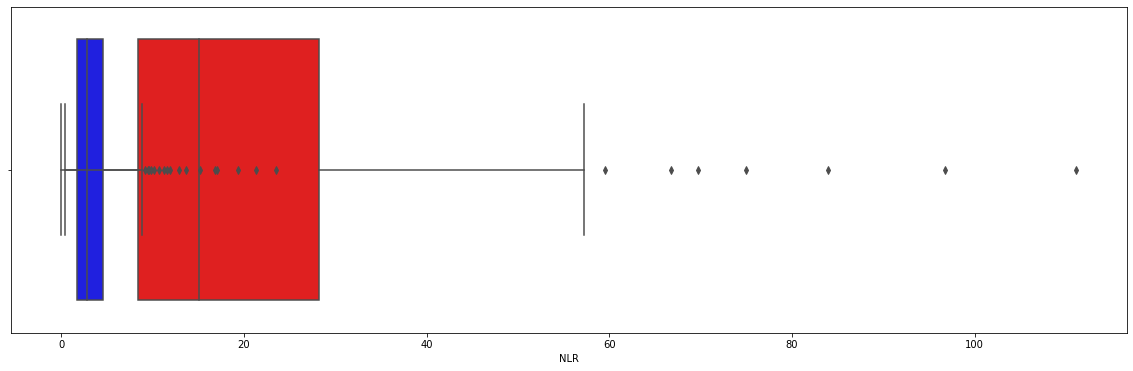

In [16]:
plt.figure(figsize=(20,6))
sns.boxplot(df_clean[df_clean.outcome == 0].NLR, color="b")
sns.boxplot(df_clean[df_clean.outcome == 1].NLR, color="r")

<AxesSubplot:xlabel='Hypersensitive c-reactive protein'>

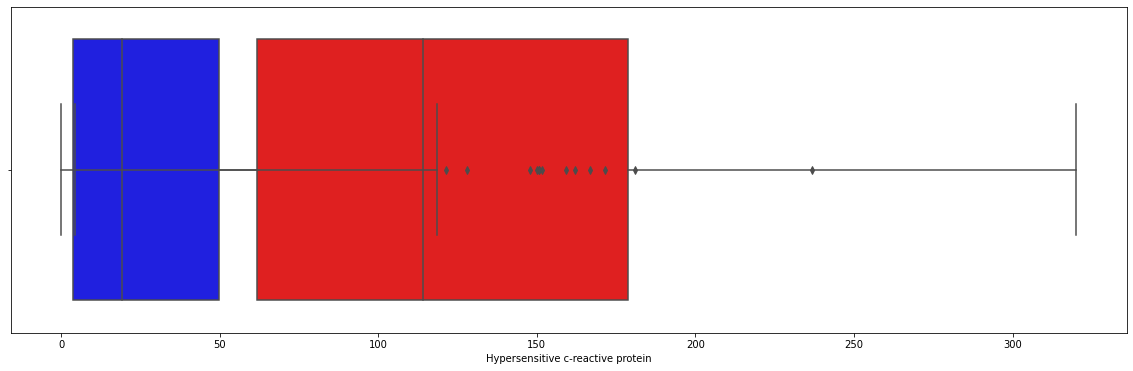

In [17]:
plt.figure(figsize=(20,6))
sns.boxplot(df_clean[df_clean.outcome == 0]["Hypersensitive c-reactive protein"], color="b")
sns.boxplot(df_clean[df_clean.outcome == 1]["Hypersensitive c-reactive protein"], color="r")